# Interactive Learning Course
## HW #2, Multi-Armed Bandits

In [1]:
import numpy as np
from abc import ABC, abstractmethod
#import gym
import matplotlib.pyplot as plt

# Part 2

## Reward class

In [2]:
class Reward(ABC):
    def __init__(self, debts=[5, 20, 100]):
        super(Reward, self).__init__()
        self.debts = debts
        
    @abstractmethod
    def get_reward(self, action):
        pass

In [3]:
class Student(Reward):
    def __init__(self):
        super(Student, self).__init__()

    def get_reward(self, action):
        if action == 0:
            obs = np.random.choice([4, 5, 5.1], p=[0.2, 0.2, 0.6]) 
        elif action == 1:
            obs = np.random.choice([5, 10, 20, 20.75], p=[0.5, 0.3, 0.1, 0.1]) 
        else:
            obs = np.random.choice([10, 20, 50, 100, 105], p=[0.5, 0.3, 0.1, 0.05, 0.05]) 
        
        return obs, obs - self.debts[action]

In [4]:
class GovStaff(Reward):
    def __init__(self):
        super(GovStaff, self).__init__()

    def get_reward(self, action):
        if action == 0:
            obs = np.random.choice([4, 5, 5.1], p=[0.05, 0.3, 0.65])
            #-0.015
        elif action == 1:
            obs = np.random.choice([5, 10, 20, 20.75], p=[0.1, 0.1, 0.3, 0.5])
            #-2.125
        else:
            obs = np.random.choice([20, 50, 80, 100, 105], p=[0.1, 0.1, 0.2, 0.3, 0.3])
            #-15.5
        
        return obs, obs - self.debts[action]

In [5]:
class SelfEmp(Reward):
    def __init__(self):
        super(SelfEmp, self).__init__()

    def get_reward(self, action):
        if action == 0:
            obs = np.random.choice([0, 2.5, 5.1], p=[0.8, 0.1, 0.1])
            #-4.24
        elif action == 1:
            obs = np.random.choice([5, 10, 20, 20.75], p=[0.05, 0.05, 0.3, 0.6])
            #-0.8
        else:
            obs = np.random.choice([20, 50, 80, 100, 105], p=[0.02, 0.03, 0.05, 0.2, 0.7])
            #-0.6
        return obs, obs - self.debts[action]

## Environment

In [6]:
class Environment:
    def __init__(self, id, reward):
        self.id = id
        self.reward = reward

    def calc_reward(self,action):
        self.reward = self.id.get_reward(action)
        return self.reward
   
    def get_available_actions(self,Actions):
        return Actions

# Part 3

In [7]:
class Action:
    def __init__(self, name):
        self.name = name
        self.mean = 0
        self.No = 0
        self.Upper_Confidence_Bound=0
        self.preference = 0
    def reset_value(self):
        self.mean = 0
        self.No = 0
        self.Upper_Confidence_Bound = 0
        self.preference = 0
    

In [8]:
class e_greedy_agent:
    def __init__(self, _id, env=None, alpha=0, beta=1, gamma=1 , epsilon = 1):
        self.env = env
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.epsilon = epsilon
        
    
    def calculate_utility(self, reward):
        utility = self.beta * (reward) ** self.gamma + self.alpha
        return utility
    
    def choose_value(self,Actions):
        p = np.random.random()
        if p < self.epsilon:
            j = np.random.choice(3)
        else:
            j = np.argmax([a.mean for a in Actions])
        return j
    def update_value(self,action,utility):
        action.No += 1
        action.mean = (1 - 1.0 / action.No)*action.mean + 1.0 / action.No * utility

In [9]:
class UCB_agent:
    def __init__(self, _id, env=None, alpha=0, beta=1, gamma=1 , c = 2):
        self.env = env
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.c = c
    def calculate_utility(self, reward):
        utility = self.beta * (reward) ** self.gamma + self.alpha
        return utility

    def update_value(self,action,utility):
        action.No += 1
        action.mean = (1 - 1.0 / action.No)*action.mean + 1.0 / action.No * utility

    def update_UCB(self,action,t):
        action.Upper_Confidence_Bound = action.mean + self.c * np.sqrt(2*np.log10(t)/action.No)
        return action.Upper_Confidence_Bound

    def choose_value(self,Actions):
        j = np.argmax([a.Upper_Confidence_Bound for a in Actions])
        return j 
    

In [10]:
class Gradient_Bandit_agent:
    def __init__(self, _id, env=None, alpha=0, beta=1, gamma=1 , learning_rate = 0.001):
        self.env = env
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.average_reward = 0
        
    
    def calculate_utility(self, reward):
        utility = self.beta * (reward) ** self.gamma + self.alpha
        return utility

    def update_average_reward(self,utility,t):
        self.average_reward = (self.average_reward * (t-1) + utility) / t
        return self.average_reward

    def choose_value(self,policy):
        optimal_action = np.random.choice(3,p=policy)
        return optimal_action

    def update_preference(self,Actions,optimal_action,utility,policy):

        for i in range(3):
            if (i==optimal_action):
                Actions[i].preference = Actions[i].preference + self.learning_rate * (utility - self.average_reward)*(1-policy[i])
            else:
                Actions[i].preference = Actions[i].preference - self.learning_rate * (utility - self.average_reward)*(policy[i])


    def update_policy(self,Actions):
        prefs = np.zeros((3,))
        for i in range(3):
            prefs[i] = Actions[i].preference
        exp = np.exp(prefs)
        policy = exp / np.sum(exp)
        return policy
    


# Plots

### Student Class

In [11]:
Actions = [Action(0), Action(1), Action(2)]
eg_agent1 = e_greedy_agent( 0,None, 0, 1, 1 ,0.2)
UCB_agent1 = UCB_agent(0,None,0,1,1,2)
Gradient_Bandit_agent1 = Gradient_Bandit_agent(0,None, 0, 1, 1,0.001)
student1 = Student()
Environment_student =  Environment(student1,0)

C:\Users\birzh\AppData\Local\Temp\ipykernel_6032\2147072206.py:17: RuntimeWarning: divide by zero encountered in log10
  action.Upper_Confidence_Bound = action.mean + self.c * np.sqrt(2*np.log10(t)/action.No)
C:\Users\birzh\AppData\Local\Temp\ipykernel_6032\2147072206.py:17: RuntimeWarning: invalid value encountered in sqrt
  action.Upper_Confidence_Bound = action.mean + self.c * np.sqrt(2*np.log10(t)/action.No)
C:\Users\birzh\AppData\Local\Temp\ipykernel_6032\2147072206.py:17: RuntimeWarning: invalid value encountered in double_scalars
  action.Upper_Confidence_Bound = action.mean + self.c * np.sqrt(2*np.log10(t)/action.No)
C:\Users\birzh\AppData\Local\Temp\ipykernel_6032\2147072206.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  action.Upper_Confidence_Bound = action.mean + self.c * np.sqrt(2*np.log10(t)/action.No)


Text(0.5, 1.0, 'Student')

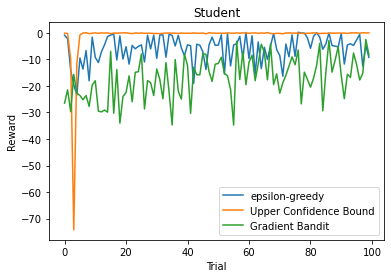

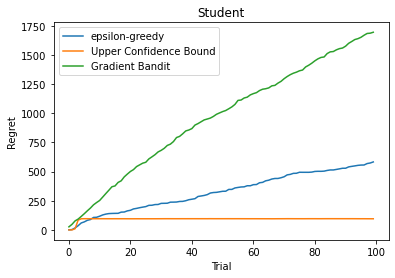

In [12]:
data_eg = np.zeros((100,))
data_mean_eg = np.zeros((100,))
data_eg_reg = np.zeros((100,))
data_mean_eg_reg = np.zeros((100,))

for k in range(20):
    Environment_student.get_available_actions(Actions)[0].reset_value()
    Environment_student.get_available_actions(Actions)[1].reset_value()
    Environment_student.get_available_actions(Actions)[2].reset_value()
    for i in range (100):
        optimal_action = eg_agent1.choose_value(Environment_student.get_available_actions(Actions))
        utility = eg_agent1.calculate_utility(Environment_student.calc_reward(optimal_action)[1])
        data_eg[i] = utility
        data_eg_reg[i] = -0.14 - utility
        eg_agent1.update_value(Environment_student.get_available_actions(Actions)[optimal_action],utility)
    data_mean_eg = data_mean_eg + data_eg/20
    data_mean_eg_reg = data_mean_eg_reg + data_eg_reg/20

data_UCB = np.zeros((100,))
data_mean_UCB = np.zeros((100,))
data_UCB_reg = np.zeros((100,))
data_mean_UCB_reg = np.zeros((100,))

for t in range(20):
    Environment_student.get_available_actions(Actions)[0].reset_value()
    Environment_student.get_available_actions(Actions)[1].reset_value()
    Environment_student.get_available_actions(Actions)[2].reset_value()
    for i in range (100):
        optimal_action = UCB_agent1.choose_value(Environment_student.get_available_actions(Actions))
        utility = UCB_agent1.calculate_utility(Environment_student.calc_reward(optimal_action)[1])
        data_UCB[i] = utility
        data_UCB_reg[i] = -0.14 - utility
        UCB_agent1.update_value(Environment_student.get_available_actions(Actions)[optimal_action],utility)
        for j in range(3):
            UCB_agent1.update_UCB(Environment_student.get_available_actions(Actions)[j],i)
    
    data_mean_UCB = data_mean_UCB + data_UCB/20
    data_mean_UCB_reg = data_mean_UCB_reg + data_UCB_reg/20


data_grad = np.zeros((100,))
data_mean_grad = np.zeros((100,))
data_grad_reg = np.zeros((100,))
data_mean_grad_reg = np.zeros((100,))

for t in range(20):
    Environment_student.get_available_actions(Actions)[0].reset_value()
    Environment_student.get_available_actions(Actions)[1].reset_value()
    Environment_student.get_available_actions(Actions)[2].reset_value()
    for i in range(100):
        policy = Gradient_Bandit_agent1.update_policy(Environment_student.get_available_actions(Actions))
        optimal_action = Gradient_Bandit_agent1.choose_value(policy)
        utility = Gradient_Bandit_agent1.calculate_utility(Environment_student.calc_reward(optimal_action)[1])
        data_grad[i] = utility
        data_grad_reg[i] = -0.14 - utility
        Gradient_Bandit_agent1.update_preference(Environment_student.get_available_actions(Actions),optimal_action,utility,policy)
        Gradient_Bandit_agent1.update_average_reward(utility,i+1) 
    data_mean_grad = data_mean_grad + data_grad/20
    data_mean_grad_reg = data_mean_grad_reg + data_grad_reg/20


plt.figure(1)
plt.plot(data_mean_eg)
plt.plot(data_mean_UCB)
plt.plot(data_mean_grad)
plt.legend(["epsilon-greedy","Upper Confidence Bound","Gradient Bandit"])
plt.xlabel("Trial")
plt.ylabel("Reward")
plt.title('Student')

plt.figure(2)
plt.plot(np.cumsum(data_mean_eg_reg))
plt.plot(np.cumsum(data_mean_UCB_reg))
plt.plot(np.cumsum(data_mean_grad_reg))
plt.legend(["epsilon-greedy","Upper Confidence Bound","Gradient Bandit"])
plt.xlabel("Trial")
plt.ylabel("Regret")
plt.title('Student')


### Goverment Staff

In [13]:
Actions = [Action(0), Action(1), Action(2)]
eg_agent2 = e_greedy_agent( 0,None, 0, 1, 1 ,0.2)
UCB_agent2 = UCB_agent(0,None,0,1,1,2)
Gradient_Bandit_agent2 = Gradient_Bandit_agent(0,None, 0, 1, 1,0.001)
GovStaff1 = GovStaff()
Environment2 = Environment(GovStaff1,0)


C:\Users\birzh\AppData\Local\Temp\ipykernel_6032\2147072206.py:17: RuntimeWarning: divide by zero encountered in log10
  action.Upper_Confidence_Bound = action.mean + self.c * np.sqrt(2*np.log10(t)/action.No)
C:\Users\birzh\AppData\Local\Temp\ipykernel_6032\2147072206.py:17: RuntimeWarning: invalid value encountered in sqrt
  action.Upper_Confidence_Bound = action.mean + self.c * np.sqrt(2*np.log10(t)/action.No)
C:\Users\birzh\AppData\Local\Temp\ipykernel_6032\2147072206.py:17: RuntimeWarning: invalid value encountered in double_scalars
  action.Upper_Confidence_Bound = action.mean + self.c * np.sqrt(2*np.log10(t)/action.No)
C:\Users\birzh\AppData\Local\Temp\ipykernel_6032\2147072206.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  action.Upper_Confidence_Bound = action.mean + self.c * np.sqrt(2*np.log10(t)/action.No)


Text(0.5, 1.0, 'Goverment Staff')

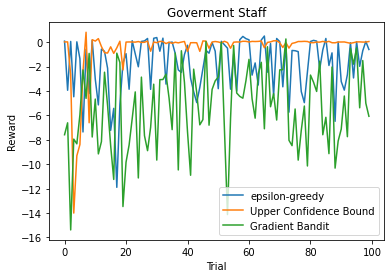

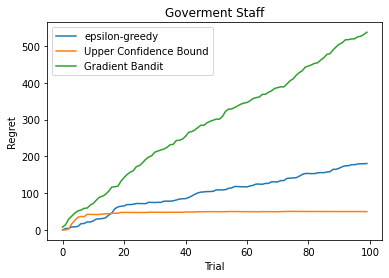

In [14]:
data_eg = np.zeros((100,))
data_mean_eg = np.zeros((100,))
data_eg_reg = np.zeros((100,))
data_mean_eg_reg = np.zeros((100,))

for k in range(20):
    Environment2.get_available_actions(Actions)[0].reset_value()
    Environment2.get_available_actions(Actions)[1].reset_value()
    Environment2.get_available_actions(Actions)[2].reset_value()
    for i in range (100):
        optimal_action = eg_agent2.choose_value(Environment2.get_available_actions(Actions))
        utility = eg_agent2.calculate_utility(Environment2.calc_reward(optimal_action)[1])
        data_eg[i] = utility
        data_eg_reg[i] = -0.015 - utility
        eg_agent2.update_value(Environment2.get_available_actions(Actions)[optimal_action],utility)
    data_mean_eg = data_mean_eg + data_eg/20
    data_mean_eg_reg = data_mean_eg_reg + data_eg_reg/20



data_UCB = np.zeros((100,))
data_mean_UCB = np.zeros((100,))
data_UCB_reg = np.zeros((100,))
data_mean_UCB_reg = np.zeros((100,))

for t in range(20):
    Environment2.get_available_actions(Actions)[0].reset_value()
    Environment2.get_available_actions(Actions)[1].reset_value()
    Environment2.get_available_actions(Actions)[2].reset_value()
    for i in range (100):
        optimal_action = UCB_agent2.choose_value(Environment2.get_available_actions(Actions))
        utility = UCB_agent2.calculate_utility(Environment2.calc_reward(optimal_action)[1])
        data_UCB[i] = utility
        data_UCB_reg[i] = -0.015 - utility
        UCB_agent2.update_value(Environment2.get_available_actions(Actions)[optimal_action],utility)
        for j in range(3):
            UCB_agent2.update_UCB(Environment2.get_available_actions(Actions)[j],i)
    data_mean_UCB = data_mean_UCB + data_UCB/20
    data_mean_UCB_reg = data_mean_UCB_reg + data_UCB_reg/20

data_grad = np.zeros((100,))
data_mean_grad = np.zeros((100,))
data_grad_reg = np.zeros((100,))
data_mean_grad_reg = np.zeros((100,))

for t in range(20):
    Environment2.get_available_actions(Actions)[0].reset_value()
    Environment2.get_available_actions(Actions)[1].reset_value()
    Environment2.get_available_actions(Actions)[2].reset_value()
    for i in range(100):
        policy = Gradient_Bandit_agent2.update_policy(Environment2.get_available_actions(Actions))
        optimal_action = Gradient_Bandit_agent2.choose_value(policy)
        utility = Gradient_Bandit_agent2.calculate_utility(Environment2.calc_reward(optimal_action)[1])
        data_grad[i] = utility
        data_grad_reg[i] = -0.015 - utility
        Gradient_Bandit_agent2.update_preference(Environment2.get_available_actions(Actions),optimal_action,utility,policy)
        Gradient_Bandit_agent2.update_average_reward(utility,i+1) 
    data_mean_grad = data_mean_grad + data_grad/20
    data_mean_grad_reg = data_mean_grad_reg + data_grad_reg/20


plt.figure(1)
plt.plot(data_mean_eg)
plt.plot(data_mean_UCB)
plt.plot(data_mean_grad)
plt.legend(["epsilon-greedy","Upper Confidence Bound","Gradient Bandit"])
plt.xlabel("Trial")
plt.ylabel("Reward")
plt.title('Goverment Staff')

plt.figure(2)
plt.plot(np.cumsum(data_mean_eg_reg))
plt.plot(np.cumsum(data_mean_UCB_reg))
plt.plot(np.cumsum(data_mean_grad_reg))
plt.legend(["epsilon-greedy","Upper Confidence Bound","Gradient Bandit"])
plt.xlabel("Trial")
plt.ylabel("Regret")
plt.title('Goverment Staff')

### Self-Employed

In [15]:
Actions = [Action(0), Action(1), Action(2)]
eg_agent3 = e_greedy_agent( 0,None, 0, 1, 1 ,0.2)
UCB_agent3 = UCB_agent(0,None,0,1,1,2)
Gradient_Bandit_agent3 = Gradient_Bandit_agent(0,None, 0, 1, 1,0.001)
SelfEmp1 = SelfEmp()
Environment3 = Environment(SelfEmp1,0)

C:\Users\birzh\AppData\Local\Temp\ipykernel_6032\2147072206.py:17: RuntimeWarning: divide by zero encountered in log10
  action.Upper_Confidence_Bound = action.mean + self.c * np.sqrt(2*np.log10(t)/action.No)
C:\Users\birzh\AppData\Local\Temp\ipykernel_6032\2147072206.py:17: RuntimeWarning: invalid value encountered in sqrt
  action.Upper_Confidence_Bound = action.mean + self.c * np.sqrt(2*np.log10(t)/action.No)
C:\Users\birzh\AppData\Local\Temp\ipykernel_6032\2147072206.py:17: RuntimeWarning: invalid value encountered in double_scalars
  action.Upper_Confidence_Bound = action.mean + self.c * np.sqrt(2*np.log10(t)/action.No)
C:\Users\birzh\AppData\Local\Temp\ipykernel_6032\2147072206.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  action.Upper_Confidence_Bound = action.mean + self.c * np.sqrt(2*np.log10(t)/action.No)


Text(0.5, 1.0, 'Self-Employed')

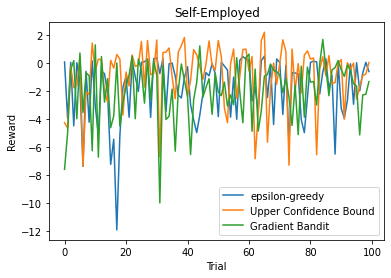

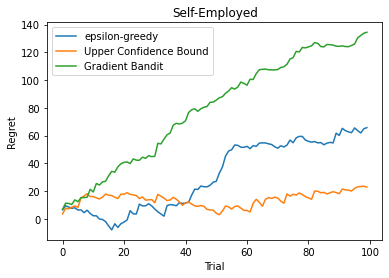

In [16]:
data = np.zeros((100,))
data_mean = np.zeros((100,))
data_eg_reg = np.zeros((100,))
data_mean_eg_reg = np.zeros((100,))

for k in range(20):
    Environment3.get_available_actions(Actions)[0].reset_value()
    Environment3.get_available_actions(Actions)[1].reset_value()
    Environment3.get_available_actions(Actions)[2].reset_value()
    for i in range (100):
        optimal_action = eg_agent3.choose_value(Environment3.get_available_actions(Actions))
        utility = eg_agent3.calculate_utility(Environment3.calc_reward(optimal_action)[1])
        data[i] = utility
        data_eg_reg[i] = -0.6 - utility

        eg_agent3.update_value(Environment3.get_available_actions(Actions)[optimal_action],utility)
    data_mean = data_mean + data/20
    data_mean_eg_reg = data_mean_eg_reg + data_eg_reg/20


data_UCB = np.zeros((100,))
data_mean_UCB = np.zeros((100,))
data_UCB_reg = np.zeros((100,))
data_mean_UCB_reg = np.zeros((100,))

for t in range(20):
    Environment3.get_available_actions(Actions)[0].reset_value()
    Environment3.get_available_actions(Actions)[1].reset_value()
    Environment3.get_available_actions(Actions)[2].reset_value()
    for i in range (100):
        optimal_action = UCB_agent3.choose_value(Environment3.get_available_actions(Actions))
        utility = UCB_agent3.calculate_utility(Environment3.calc_reward(optimal_action)[1])
        data_UCB[i] = utility
        data_UCB_reg[i] = -0.6 - utility
        UCB_agent3.update_value(Environment3.get_available_actions(Actions)[optimal_action],utility)
        for j in range(3):
            UCB_agent3.update_UCB(Environment3.get_available_actions(Actions)[j],i)
    data_mean_UCB = data_mean_UCB + data_UCB/20
    data_mean_UCB_reg = data_mean_UCB_reg + data_UCB_reg/20


data_grad = np.zeros((100,))
data_mean_grad = np.zeros((100,))
data_grad_reg = np.zeros((100,))
data_mean_grad_reg = np.zeros((100,))

for t in range(20):
    Environment3.get_available_actions(Actions)[0].reset_value()
    Environment3.get_available_actions(Actions)[1].reset_value()
    Environment3.get_available_actions(Actions)[2].reset_value()
    for i in range(100):
        policy = Gradient_Bandit_agent3.update_policy(Environment3.get_available_actions(Actions))
        optimal_action = Gradient_Bandit_agent3.choose_value(policy)
        utility = Gradient_Bandit_agent3.calculate_utility(Environment3.calc_reward(optimal_action)[1])
        data_grad[i] = utility
        data_grad_reg[i] = -0.6 - utility
        Gradient_Bandit_agent3.update_preference(Environment3.get_available_actions(Actions),optimal_action,utility,policy)
        Gradient_Bandit_agent3.update_average_reward(utility,i+1) 
    data_mean_grad = data_mean_grad + data_grad/20
    data_mean_grad_reg = data_mean_grad_reg + data_grad_reg/20


plt.figure(1)
plt.plot(data_mean_eg)
plt.plot(data_mean_UCB)
plt.plot(data_mean_grad)
plt.legend(["epsilon-greedy","Upper Confidence Bound","Gradient Bandit"])
plt.xlabel("Trial")
plt.ylabel("Reward")
plt.title('Self-Employed')

plt.figure(2)
plt.plot(np.cumsum(data_mean_eg_reg))
plt.plot(np.cumsum(data_mean_UCB_reg))
plt.plot(np.cumsum(data_mean_grad_reg))
plt.legend(["epsilon-greedy","Upper Confidence Bound","Gradient Bandit"])
plt.xlabel("Trial")
plt.ylabel("Regret")
plt.title('Self-Employed')

# Part 5

### Student

In [17]:
learning_rate = [1 , 0.1 , 0.01 , 0.001]

Text(0.5, 1.0, 'Student')

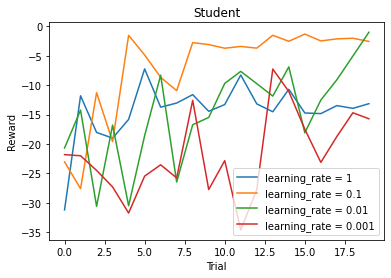

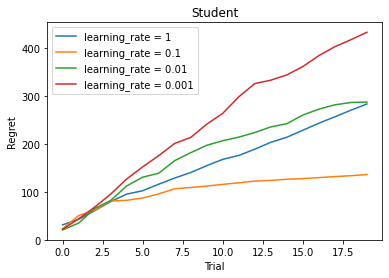

In [24]:
data_grad = np.zeros((20,1))
data_mean_grad = np.zeros((20,4))
data_grad_reg = np.zeros((20,1))
data_mean_grad_reg = np.zeros((20,4))


for j in range (4):
    Actions = [Action(0), Action(1), Action(2)]
    eg_agent1 = e_greedy_agent( 0,None, 0, 1, 1 ,0.2)
    UCB_agent1 = UCB_agent(0,None,0,1,1,4)
    Gradient_Bandit_agent1 = Gradient_Bandit_agent(0,None, 0, 1, 1,learning_rate[j])
    student1 = Student()
    Environment_student =  Environment(student1,0)
    for t in range(20):
        Environment_student.get_available_actions(Actions)[0].reset_value()
        Environment_student.get_available_actions(Actions)[1].reset_value()
        Environment_student.get_available_actions(Actions)[2].reset_value()
        for i in range(20):
            policy = Gradient_Bandit_agent1.update_policy(Environment_student.get_available_actions(Actions))
            optimal_action = Gradient_Bandit_agent1.choose_value(policy)
            utility = Gradient_Bandit_agent1.calculate_utility(Environment_student.calc_reward(optimal_action)[1])
            data_grad[i,0] = utility
            data_grad_reg[i,0] = -0.14 - utility
            Gradient_Bandit_agent1.update_preference(Environment_student.get_available_actions(Actions),optimal_action,utility,policy)
            Gradient_Bandit_agent1.update_average_reward(utility,i+1) 
        data_mean_grad[:,j] = data_mean_grad[:,j] + data_grad[:,0]/20
        data_mean_grad_reg[:,j] = data_mean_grad_reg[:,j] + data_grad_reg[:,0]/20


plt.figure(1)
plt.plot(data_mean_grad[:,0])
plt.plot(data_mean_grad[:,1])
plt.plot(data_mean_grad[:,2])
plt.plot(data_mean_grad[:,3])
plt.legend(["learning_rate = 1","learning_rate = 0.1","learning_rate = 0.01","learning_rate = 0.001"])
plt.xlabel("Trial")
plt.ylabel("Reward")
plt.title("Student")

plt.figure(2)
plt.plot(np.cumsum(data_mean_grad_reg[:,0]))
plt.plot(np.cumsum(data_mean_grad_reg[:,1]))
plt.plot(np.cumsum(data_mean_grad_reg[:,2]))
plt.plot(np.cumsum(data_mean_grad_reg[:,3]))
plt.legend(["learning_rate = 1","learning_rate = 0.1","learning_rate = 0.01","learning_rate = 0.001"])
plt.xlabel("Trial")
plt.ylabel("Regret")
plt.title("Student")
    


### Goverment Staff

Text(0.5, 1.0, 'Goverment Staff')

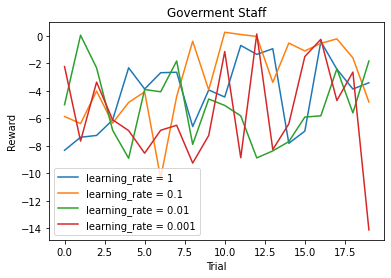

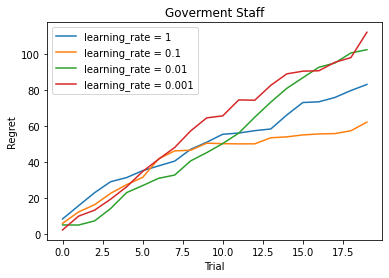

In [25]:
data_grad = np.zeros((20,1))
data_mean_grad = np.zeros((20,4))
data_grad_reg = np.zeros((20,1))
data_mean_grad_reg = np.zeros((20,4))

for j in range(4):
    Actions = [Action(0), Action(1), Action(2)]
    Gradient_Bandit_agent2 = Gradient_Bandit_agent(0,None, 0, 1, 1,learning_rate[j])
    GovStaff1 = GovStaff()
    Environment2 = Environment(GovStaff1,0)
    for t in range(20):
        Environment2.get_available_actions(Actions)[0].reset_value()
        Environment2.get_available_actions(Actions)[1].reset_value()
        Environment2.get_available_actions(Actions)[2].reset_value()
        for i in range(20):
            policy = Gradient_Bandit_agent2.update_policy(Environment2.get_available_actions(Actions))
            optimal_action = Gradient_Bandit_agent2.choose_value(policy)
            utility = Gradient_Bandit_agent2.calculate_utility(Environment2.calc_reward(optimal_action)[1])
            data_grad[i,0] = utility
            data_grad_reg[i,0] = -0.015 - utility
            Gradient_Bandit_agent2.update_preference(Environment2.get_available_actions(Actions),optimal_action,utility,policy)
            Gradient_Bandit_agent2.update_average_reward(utility,i+1) 
        data_mean_grad[:,j] = data_mean_grad[:,j] + data_grad[:,0]/20
        data_mean_grad_reg[:,j] = data_mean_grad_reg[:,j] + data_grad_reg[:,0]/20

plt.figure(1)
plt.plot(data_mean_grad[:,0])
plt.plot(data_mean_grad[:,1])
plt.plot(data_mean_grad[:,2])
plt.plot(data_mean_grad[:,3])
plt.legend(["learning_rate = 1","learning_rate = 0.1","learning_rate = 0.01","learning_rate = 0.001"])
plt.xlabel("Trial")
plt.ylabel("Reward")
plt.title("Goverment Staff")

plt.figure(2)
plt.plot(np.cumsum(data_mean_grad_reg[:,0]))
plt.plot(np.cumsum(data_mean_grad_reg[:,1]))
plt.plot(np.cumsum(data_mean_grad_reg[:,2]))
plt.plot(np.cumsum(data_mean_grad_reg[:,3]))
plt.legend(["learning_rate = 1","learning_rate = 0.1","learning_rate = 0.01","learning_rate = 0.001"])
plt.xlabel("Trial")
plt.ylabel("Regret")
plt.title("Goverment Staff")

### Self_Employed

Text(0.5, 1.0, 'Self-Employed')

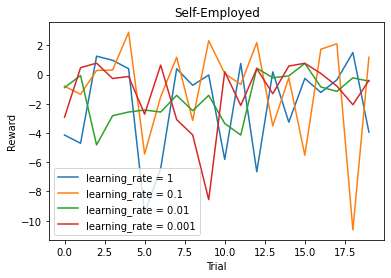

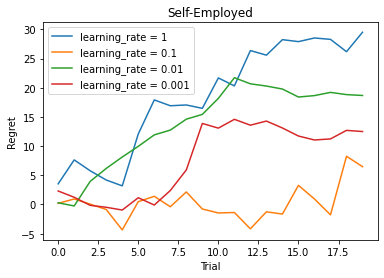

In [29]:
Actions = [Action(0), Action(1), Action(2)]
Gradient_Bandit_agent3 = Gradient_Bandit_agent(0,None, 0, 1, 1,0.001)
SelfEmp1 = SelfEmp()
Environment3 = Environment(SelfEmp1,0)

data_grad = np.zeros((20,1))
data_mean_grad = np.zeros((20,4))
data_grad_reg = np.zeros((20,1))
data_mean_grad_reg = np.zeros((20,4))

for j in range(4):
    Actions = [Action(0), Action(1), Action(2)]
    Gradient_Bandit_agent3 = Gradient_Bandit_agent(0,None, 0, 1, 1,learning_rate[j])
    SelfEmp1 = SelfEmp()
    Environment3 = Environment(SelfEmp1,0)
    for t in range(20):
        Environment3.get_available_actions(Actions)[0].reset_value()
        Environment3.get_available_actions(Actions)[1].reset_value()
        Environment3.get_available_actions(Actions)[2].reset_value()
        for i in range(20):
            policy = Gradient_Bandit_agent3.update_policy(Environment3.get_available_actions(Actions))
            optimal_action = Gradient_Bandit_agent3.choose_value(policy)
            utility = Gradient_Bandit_agent3.calculate_utility(Environment3.calc_reward(optimal_action)[1])
            data_grad[i,0] = utility
            data_grad_reg[i,0] = -0.6 - utility
            Gradient_Bandit_agent3.update_preference(Environment3.get_available_actions(Actions),optimal_action,utility,policy)
            Gradient_Bandit_agent3.update_average_reward(utility,i+1) 
        data_mean_grad[:,j] = data_mean_grad[:,j] + data_grad[:,0]/20
        data_mean_grad_reg[:,j] = data_mean_grad_reg[:,j] + data_grad_reg[:,0]/20



plt.figure(1)
plt.plot(data_mean_grad[:,0])
plt.plot(data_mean_grad[:,1])
plt.plot(data_mean_grad[:,2])
plt.plot(data_mean_grad[:,3])
plt.legend(["learning_rate = 1","learning_rate = 0.1","learning_rate = 0.01","learning_rate = 0.001"])
plt.xlabel("Trial")
plt.ylabel("Reward")
plt.title("Self-Employed")

plt.figure(2)
plt.plot(np.cumsum(data_mean_grad_reg[:,0]))
plt.plot(np.cumsum(data_mean_grad_reg[:,1]))
plt.plot(np.cumsum(data_mean_grad_reg[:,2]))
plt.plot(np.cumsum(data_mean_grad_reg[:,3]))
plt.legend(["learning_rate = 1","learning_rate = 0.1","learning_rate = 0.01","learning_rate = 0.001"])
plt.xlabel("Trial")
plt.ylabel("Regret")
plt.title("Self-Employed")